In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re

from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection


In [124]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

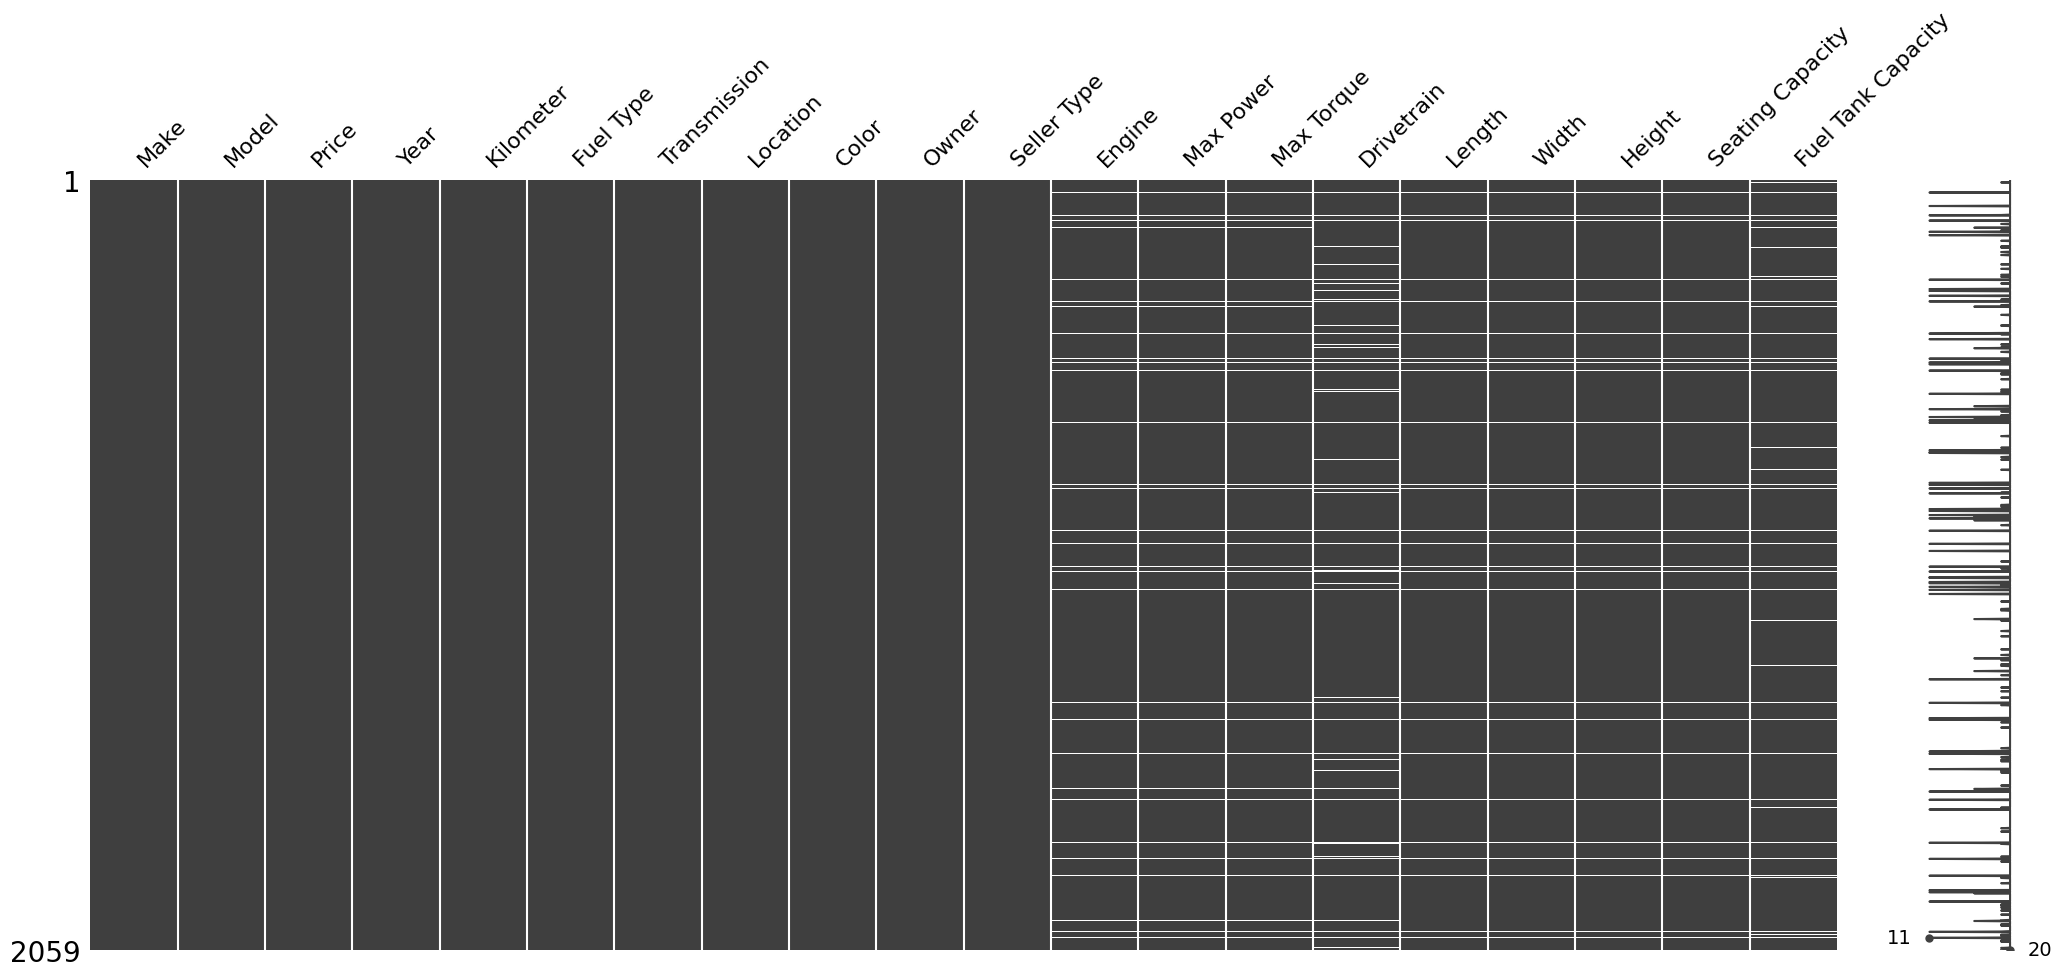

In [125]:
msno.matrix(full_df)

In [126]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [127]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 934 to 1836
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1578 non-null   object 
 12  Max Power           1578 non-null   object 
 13  Max Torque          1578 non-null   object 
 14  Drivetrain          1530 non-null   object 
 15  Length              1591 non-null   float64
 16  Width    

In [129]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 2 to 329
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              401 non-null    object 
 12  Max Power           401 non-null    object 
 13  Max Torque          401 non-null    object 
 14  Drivetrain          393 non-null    object 
 15  Length              404 non-null    float64
 16  Width        

In [130]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
934,Maruti Suzuki,Celerio ZXi [2019-2020],475000,2019,25000,Petrol,Manual,Muzaffurpur,Grey,First,Individual,998 cc,67 bhp @ 6000 rpm,90 Nm @ 3500 rpm,FWD,3695.0,1600.0,1560.0,5.0,35.0
1791,Hyundai,Grand i10 Magna 1.2 Kappa VTVT [2013-2016],399000,2018,38000,Petrol,Manual,Kolkata,Silver,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0
1890,Mercedes-Benz,S-Class S 450,20000000,2021,6600,Petrol,Automatic,Delhi,White,First,Individual,2996 cc,362 bhp @ 5250 rpm,500 Nm @ 1800 rpm,RWD,5246.0,1899.0,1494.0,5.0,80.0
518,Maruti Suzuki,Alto VXi (O) [2014-2019],160000,2011,72000,Petrol,Manual,Kanpur,Silver,First,Individual,998 cc,67 bhp @ 6000 rpm,90 Nm @ 3500 rpm,FWD,3545.0,1490.0,1475.0,5.0,35.0
809,Hyundai,i20 Sportz 1.2 (O),335000,2013,80500,Petrol,Manual,Ambala Cantt,White,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
1171,Jeep,Compass Model S (O) 1.4 Petrol DCT,2700000,2021,17000,Petrol,Automatic,Delhi,Blue,First,Individual,1368 cc,161 bhp @ 5500 rpm,250 Nm @ 2500 rpm,FWD,4405.0,1818.0,1640.0,5.0,60.0
287,Hyundai,Creta 1.6 SX Plus AT Petrol,960000,2016,37079,Petrol,Automatic,Thane,Red,First,Individual,1591 cc,122 bhp @ 6400 rpm,154 Nm @ 4850 rpm,FWD,4270.0,1780.0,1630.0,5.0,60.0
1482,Volkswagen,Polo Highline Plus 1.0L TSI,950000,2021,24000,Petrol,Manual,Mangalore,White,First,Individual,999 cc,109 bhp @ 5000 rpm,175 Nm @ 1750 rpm,FWD,3971.0,1682.0,1469.0,5.0,45.0
339,Tata,Safari 2.2 EX 4x2,375000,2013,97000,Diesel,Manual,Ambala Cantt,Black,First,Individual,2179 cc,138 bhp @ 4000 rpm,320 Nm @ 1700 rpm,RWD,4655.0,1965.0,1922.0,7.0,55.0


In [132]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))+" cc"
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)

<Axes: >

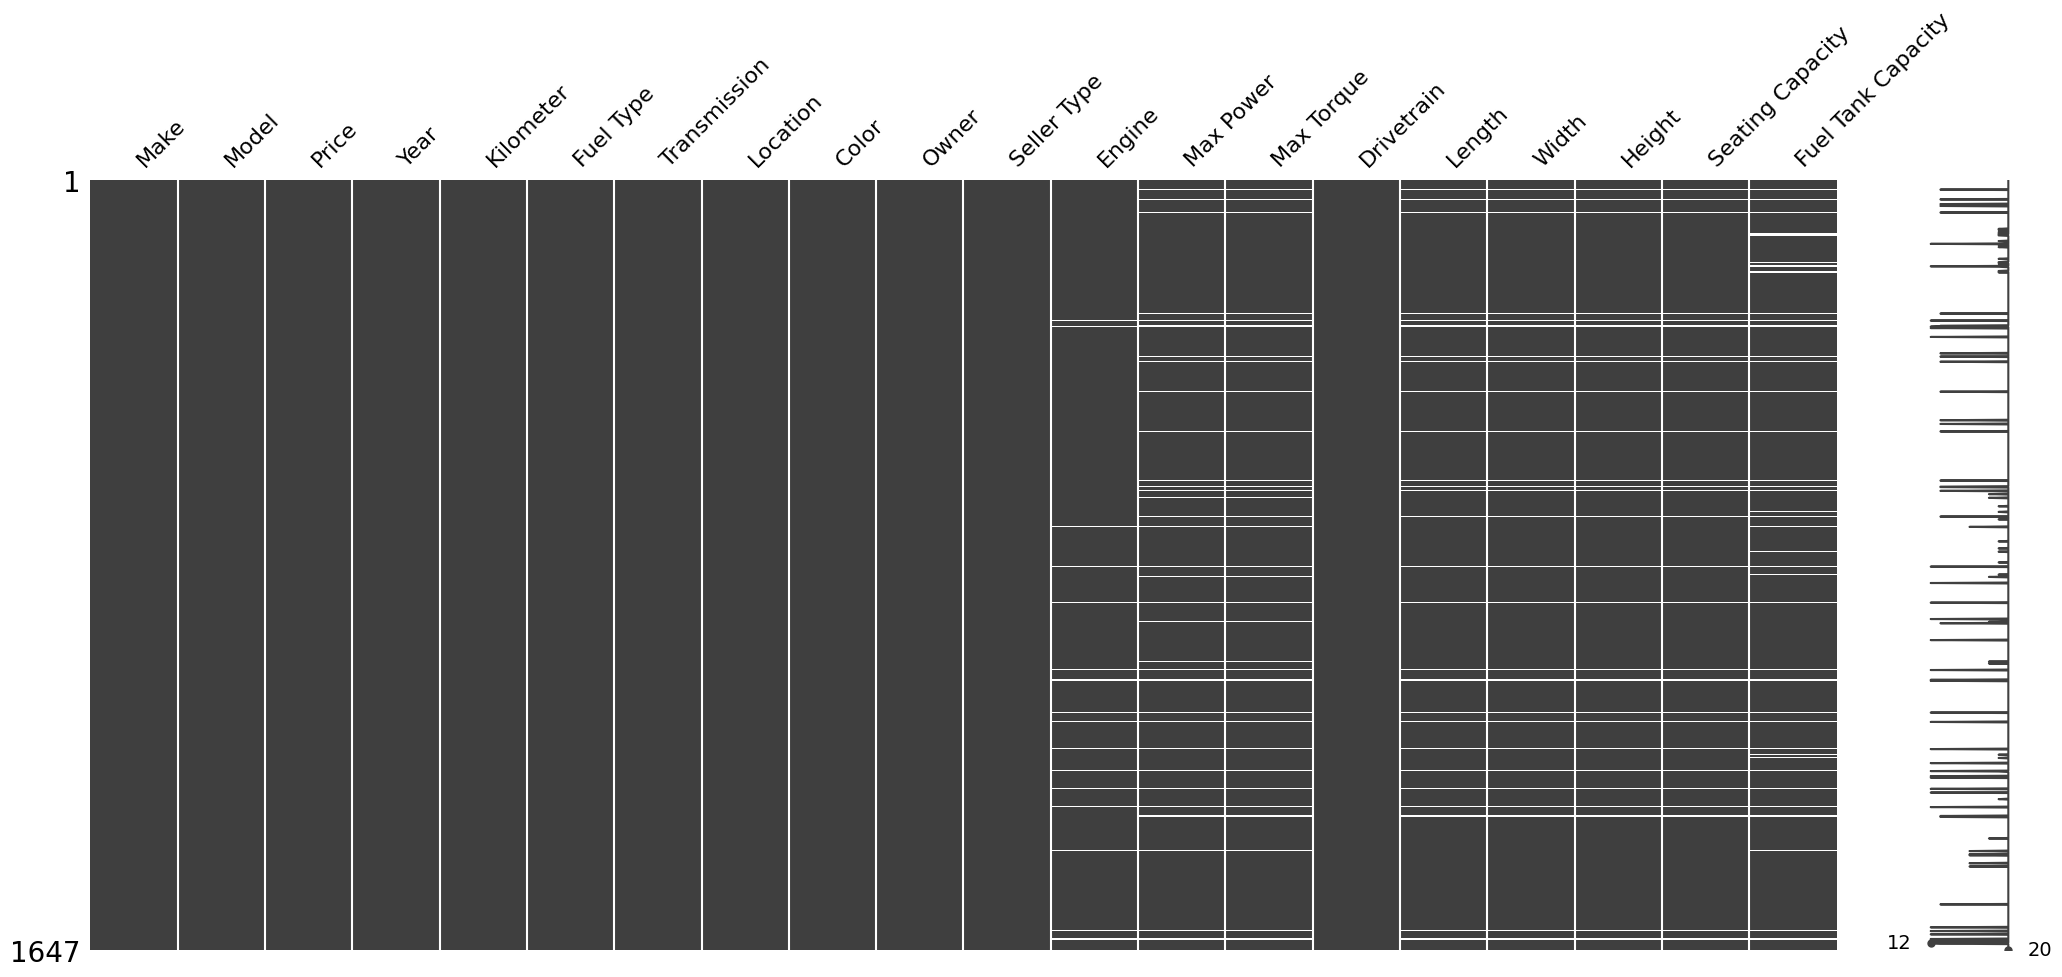

In [139]:
msno.matrix(train_df)

In [135]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [140]:
train_df = train_df.dropna()

NameError: name 'dropna' is not defined